In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.stats import gmean   

In [2]:
def sharpe_ratio(df):
    # Calculate daily returns
    df['returns'] = df['Wealth'].pct_change()
    
    # Calculate rolling 21 day mean of excess returns
    df['mean_excess_returns'] = df['returns'].rolling(window=53).apply(lambda x: gmean(1 + x) - 1, raw=True)
    
    # Calculate rolling 21 day standard deviation of excess returns
    df['std_excess_returns'] = df['returns'].rolling(window=53).std()
    
    # Calculate rolling 21 day Sharpe Ratio
    df['SharpeRatio'] = df['mean_excess_returns'] / df['std_excess_returns']
    
    # Drop intermediate columns
    df.drop(['returns','mean_excess_returns', 'std_excess_returns'], axis=1, inplace=True)
    
    # Return dataframe with date and SharpeRatio columns
    return df[['date', 'SharpeRatio']]

In [3]:
datatype = 'broad'
EW_value = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
# TTrain_value = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))

In [4]:
plt.close("all")
plt.rcParams["font.family"] ="serif"
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['text.usetex'] = True

In [6]:
sharpe_results = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])


In [6]:
sharpe_results_broad

NameError: name 'sharpe_results_broad' is not defined

In [23]:
print(sharpe_results_broad.to_latex(index=False, float_format="{:.4f}".format))

\begin{tabular}{lrrr}
\toprule
            Strategy &  Sharpe Ratio &  Return &  Volatility \\
\midrule
                  EW &        0.4276 &  0.0058 &      0.0135 \\
                  RP &        0.4415 &  0.0038 &      0.0086 \\
      Learn \$\textbackslash delta\$ &        0.5166 &  0.0053 &      0.0103 \\
           Learn \$T\$ &        0.3654 &  0.0053 &      0.0144 \\
Learn \$T\$ - Diagonal &        0.3443 &  0.0057 &      0.0165 \\
      Learn \$\textbackslash alpha\$ &        0.4757 &  0.0044 &      0.0093 \\
\bottomrule
\end{tabular}



C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\1344445168.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sharpe_results_broad.to_latex(index=False, float_format="{:.4f}".format))


For MVO. Mean: 0.0124464188943684. Vol: 0.01972862968819569. Sharpe: 0.6308810642746017
For MVO - Learn $T$. Mean: 0.033206770312067285. Vol: 0.028817354396985836. Sharpe: 1.1523184902615682
For Robust MVO. Mean: 0.010920479870547548. Vol: 0.036162970837489414. Sharpe: 0.30197961112272637


C:\Users\Rafay\AppData\Local\Temp\ipykernel_20308\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20308\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20308\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)


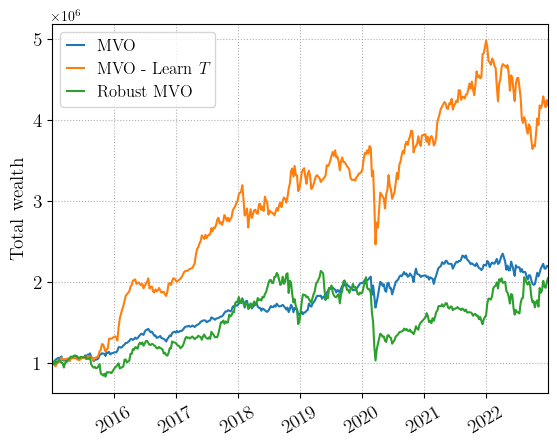

In [35]:
datatype = 'broad'
MVO_value_broad = pd.read_pickle('ResultsMVO_{}_value.pkl'.format(datatype))
MVONormTrained_value_broad = pd.read_pickle('ResultsMVONormTrained_{}_value.pkl'.format(datatype))
RobMVO_value_broad = pd.read_pickle('ResultsRobMVO_{}_value.pkl'.format(datatype))

fig = plt.figure()
names = ['MVO', 'MVO - Learn $T$', 'Robust MVO']
frames = [MVO_value_broad, MVONormTrained_value_broad, RobMVO_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

For MVO. Mean: 0.004009920869098969. Vol: 0.008766735735048086. Sharpe: 0.45740181868011726
For MVO - Learn $S$. Mean: 0.013061944029096065. Vol: 0.015919116451503446. Sharpe: 0.8205194094087086
For Robust MVO. Mean: 0.000508236483424955. Vol: 0.005953472376991892. Sharpe: 0.08536807618174444


C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\838974196.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\838974196.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\838974196.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)


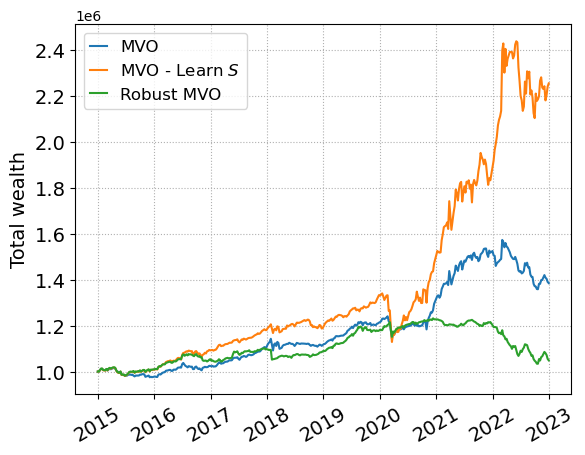

In [29]:
datatype = 'cross_asset'
MVO_value_broad = pd.read_pickle('ResultsMVO_{}_value.pkl'.format(datatype))
MVONormTrained_value_broad = pd.read_pickle('ResultsMVONormTrained_{}_value.pkl'.format(datatype))
RobMVO_value_broad = pd.read_pickle('ResultsRobMVO_{}_value.pkl'.format(datatype))

fig = plt.figure()
names = ['MVO', 'MVO - Learn $S$', 'Robust MVO']
frames = [MVO_value_broad, MVONormTrained_value_broad, RobMVO_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.iloc[-1]['Wealth']/frame.iloc[0]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

In [ ]:
'''
(i) apply ledoit and wolfes shrinkage estimate to the covariance of RP as a competitor
(ii) make it extremely clear via figures that we are essentially just predicting when EW beats RP (i.e. the rolling sharpe over the training set figure)
(iii) consider the case where we are learning the norm defined by the diagonal matrix
(iv) do an experiment on learning alpha where the resulting portfolio is alpha*x_{ew} + alpha x_{rp} (i.e. formulate this as a regression in alpha over the training set) ... x_{rp} and x_{ew} would have be constant
(v) learn some prediction model for when EW beats RP and embed that in the end to end distributionally robust RP i.e. identify features that predict the amount of correlation in the market) - we could construct a contrived example for covid period (i.e. have some analyst predict that correlations will spike so we use RP during 2020 crash which obviously beats EW)

'''




In [202]:
test = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
test.head()

,date,FTGC,BNDX,SPY
0,2016-01-08,0.149396,0.699416,0.151188
1,2016-01-15,0.145427,0.699274,0.155299
2,2016-01-22,0.162914,0.664710,0.172376
3,2016-01-29,0.150559,0.677563,0.171879
4,2016-02-05,0.163775,0.642520,0.193704


C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\1650342338.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\1650342338.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\1650342338.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_7120\1650342338.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

For EW. Mean: 0.005777667886153065. Vol: 0.013510456806047445. Sharpe: 0.427644155123379
For RP. Mean: 0.003788094302409004. Vol: 0.008580952858401889. Sharpe: 0.44145380646159343
For Learn $\delta$. Mean: 0.005310023688541943. Vol: 0.010278946388411194. Sharpe: 0.5165922155726612
For Learn $T$. Mean: 0.005268387158260647. Vol: 0.01441843225068941. Sharpe: 0.3653925105490399
For Learn $T$ - Diagonal. Mean: 0.005680874550810067. Vol: 0.01650198812288625. Sharpe: 0.34425394737324927
For Learn $\alpha$. Mean: 0.004440150584590327. Vol: 0.00933369292656824. Sharpe: 0.4757120916150449


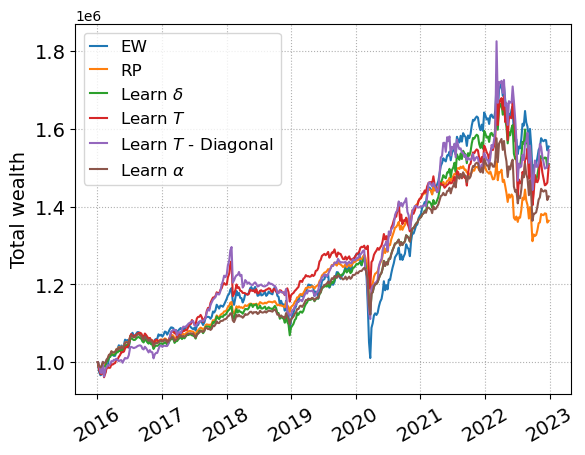

In [22]:
datatype = 'cross_asset_fixed'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
DRRPW_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
DRRPW_T_value_broad = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))
DRRPW_TDiagonal_value_broad = pd.read_pickle('ResultsDRRPWTTrained_Diagonal_{}_value.pkl'.format(datatype))
LinearEWAndRPOptimizer_value_broad = pd.read_pickle('ResultsLinearEWAndRPOptimizer_{}_value.pkl'.format(datatype))

frames = [EW_value_broad, RP_value_broad, DRRPW_value_broad, DRRPW_T_value_broad, DRRPW_TDiagonal_value_broad, LinearEWAndRPOptimizer_value_broad]
names = ['EW', 'RP', 'Learn $\delta$', 'Learn $T$', 'Learn $T$ - Diagonal', r'Learn $\alpha$']
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

fig,ax = plt.subplots()
for indx, frame in enumerate(frames):
    f = frame
    ax.plot(f['date'], f['Wealth'], label=names[indx])
    vol = frame['Wealth'].pct_change().std()
    mu = frame.iloc[-1]['Wealth']/frame.iloc[0]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }
    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

For EW. Mean: 0.005777667886153065. Vol: 0.013510456806047445. Sharpe: 0.427644155123379
For RP. Mean: 0.003788094302409004. Vol: 0.008580952858401889. Sharpe: 0.44145380646159343
For Learn $\delta$. Mean: 0.0016003440624151228. Vol: 0.009709465191641273. Sharpe: 0.16482309074992452
For Learn $T$. Mean: 0.0013090591979131386. Vol: 0.00785465422996056. Sharpe: 0.16666032133151093


C:\Users\Rafay\AppData\Local\Temp\ipykernel_22640\1476125265.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_22640\1476125265.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_22640\1476125265.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_22640\1476125265.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

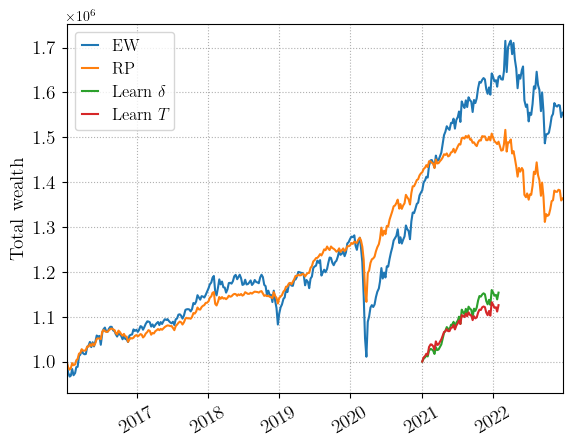

In [5]:
datatype = 'cross_asset_fixed'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
DRRPW_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
DRRPW_custom_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrainedCustom_{}_value.pkl'.format(datatype))

frames = [EW_value_broad, RP_value_broad, DRRPW_value_broad, DRRPW_custom_value_broad]
names = ['EW', 'RP', 'Learn $\delta$', 'Learn $delta$ - Custom']
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

fig,ax = plt.subplots()
for indx, frame in enumerate(frames):
    f = frame
    ax.plot(f['date'], f['Wealth'], label=names[indx])
    vol = frame['Wealth'].pct_change().std()
    mu = frame.iloc[-1]['Wealth']/frame.iloc[0]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }
    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

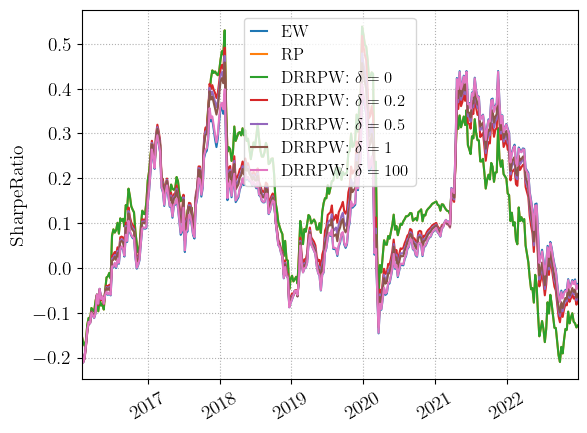

In [213]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
# NN_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_lookback52_value.pkl'.format(datatype))
# TTrain_value_broad = pd.read_pickle('ResultsDRRPWTTrained_{}_lookback52_value.pkl'.format(datatype))
# DRRPWTTrained_Diagonal_value_broad = pd.read_pickle('ResultsDRRPWTTrained_Diagonal_{}_lookback52_value.pkl'.format(datatype))
# RP_Shrinkage_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_lookback10_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Learn $\delta$', 'Learn T', 'RP w/ Shrinkage', 'Learn T - Diagonal']
frames = [EW_value_broad, RP_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    frame = sharpe_ratio(frame)
    ax.plot(frame['date'], frame['SharpeRatio'], label=names[indx])
    # frame = frame.set_index('date')
    # vol = frame['Wealth'].pct_change().std()
    # mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    # res = {
    #     'Strategy': names[indx],
    #     'Sharpe Ratio': (mu/(12*8))/vol,
    #     'Return': mu/(12*8),
    #     'Volatility': vol
    # }

    # sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    # print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

for d in [0, 0.2, 0.5, 1, 100]:
    frame = pd.read_pickle('ResultsDRRPW_delta{}_{}_value.pkl'.format(d, datatype))
    frame = sharpe_ratio(frame)
    ax.plot(frame['date'], frame['SharpeRatio'], label='DRRPW: $\delta = {}$'.format(d))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("SharpeRatio", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

In [229]:
holdings_rp = pd.read_pickle('ResultsRP_cross_asset_holdings.pkl'.format(datatype))
holdings_rp[holdings_rp['date']>='2016-01-08'].head()

,date,FTGC,BNDX,SPY
49,2016-01-08,0.149396,0.699416,0.151188
50,2016-01-15,0.145427,0.699274,0.155299
51,2016-01-22,0.162914,0.664710,0.172376
52,2016-01-29,0.150559,0.677563,0.171879
53,2016-02-05,0.163775,0.642520,0.193704


In [227]:
holdings_fwd = pd.read_pickle('ResultsDRRPWDeltaTrained_cross_asset_holdings.pkl'.format(datatype))
holdings_fwd.head()

,date,FTGC,BNDX,SPY
0,2016-01-08,0.127722,0.752309,0.119970
1,2016-01-15,0.126419,0.756131,0.117450
2,2016-01-22,0.127501,0.755418,0.117082
3,2016-01-29,0.127020,0.753349,0.119631
4,2016-02-05,0.142372,0.730085,0.127544


In [9]:
RP_value_broad[RP_value_broad['date'] > '2015-12-01']

,date,Wealth,RF,SharpeRatio
46,2015-12-04,9.731912e+05,-0.001794,NaN
47,2015-12-11,9.671413e+05,-0.039307,NaN
48,2015-12-18,9.637811e+05,-0.003419,NaN
49,2016-01-08,9.607134e+05,-0.062262,NaN
50,2016-01-15,9.519791e+05,-0.025427,NaN
...,...,...,...,...
398,2022-12-02,1.357511e+06,0.012376,-0.099469
399,2022-12-09,1.331117e+06,-0.037659,-0.129572
400,2022-12-16,1.325500e+06,-0.021099,-0.124365
401,2022-12-23,1.324256e+06,-0.003988,-0.122874


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

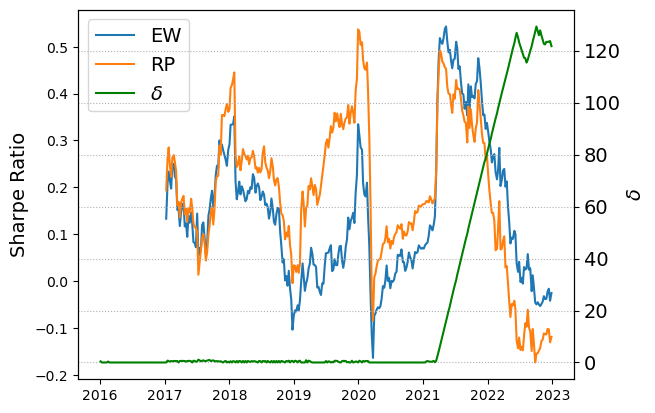

In [28]:
datatype = 'cross_asset_fixed'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
DeltaTrained = pd.read_pickle('ResultsDRRPWDeltaTrained_cross_asset_fixed_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Train $\delta$']
frames = [EW_value_broad, RP_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

ls = []
for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ls.append(ax.plot(f['date'], f['SharpeRatio'], label=names[indx]))


with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset_fixed'), 'rb') as f:
    delta_vals = pickle.load(f)

ax2 = ax.twinx()
l2 = ax2.plot(RP_value_broad.tail(len(delta_vals))['date'], delta_vals, 'g-', label='$\delta$')
lns = ls[0] + ls[1] + l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
ax2.set_ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# ax.legend(fontsize=12, handlelength=1)


In [2]:
import pandas as pd

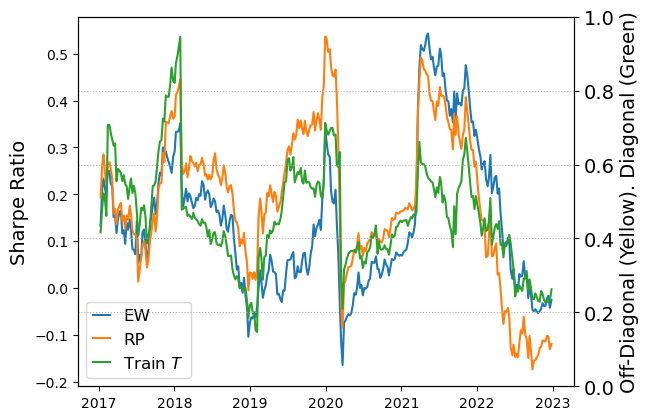

In [16]:
datatype = 'cross_asset_fixed'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
TTrained = pd.read_pickle('ResultsDRRPWTTrained_cross_asset_fixed_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Train $T$']
frames = [EW_value_broad, RP_value_broad, TTrained]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])


with open('ResultsDRRPWTTrained_diagonalvals_{}.pkl'.format('cross_asset_fixed'), 'rb') as f:
    diag_vals = pickle.load(f)
with open('ResultsDRRPWTTrained_offdiagonalvals_{}.pkl'.format('cross_asset_fixed'), 'rb') as f:
    offdiag_vals = pickle.load(f)
ax2 = ax.twinx()
# ax2.plot(RP_value_broad.tail(len(diag_vals))['date'], diag_vals, 'g-')
# ax2.plot(RP_value_broad.tail(len(offdiag_vals))['date'], offdiag_vals, 'y-')

ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
ax2.set_ylabel("Off-Diagonal (Yellow). Diagonal (Green)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.legend(fontsize=12, handlelength=1)


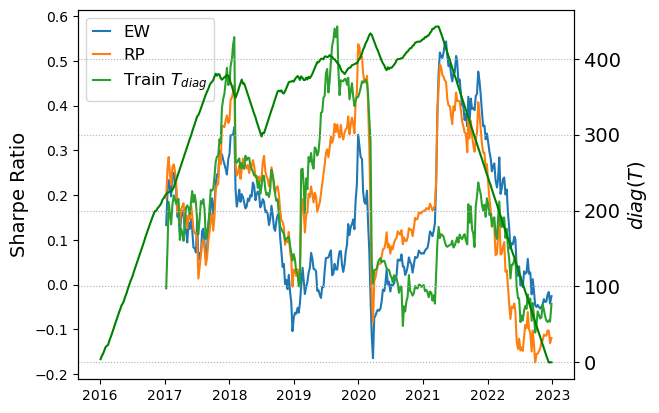

In [11]:
datatype = 'cross_asset_fixed'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
TTrained = pd.read_pickle('ResultsDRRPWTTrained_Diagonal_cross_asset_fixed_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Train $T_{diag}$']
frames = [EW_value_broad, RP_value_broad, TTrained]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])


with open('ResultsDRRPWTTrained_Diagonal_diagonalvals_{}.pkl'.format('cross_asset_fixed'), 'rb') as f:
    delta_vals = pickle.load(f)

ax2 = ax.twinx()
ax2.plot(RP_value_broad.tail(len(delta_vals))['date'], delta_vals, 'g-')

ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
ax2.set_ylabel("$diag(T)$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.legend(fontsize=12, handlelength=1)


In [38]:
class Square(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x**2

    @staticmethod
    def backward(ctx, grad_out):
        x, = ctx.saved_tensors
        return grad_out * 2 * x


In [37]:
x = torch.rand(3,3)

In [13]:
delta_vals

[0.044138761479941876]

In [2]:
import pandas as pd

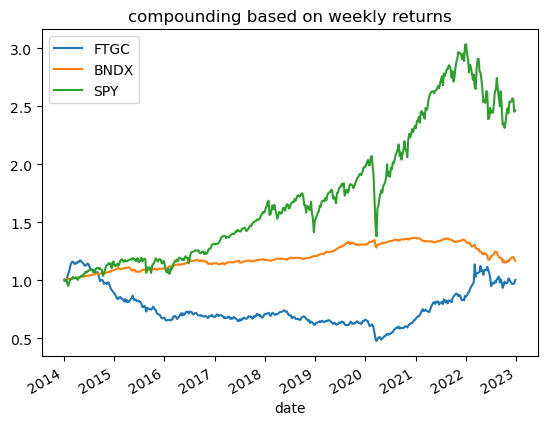

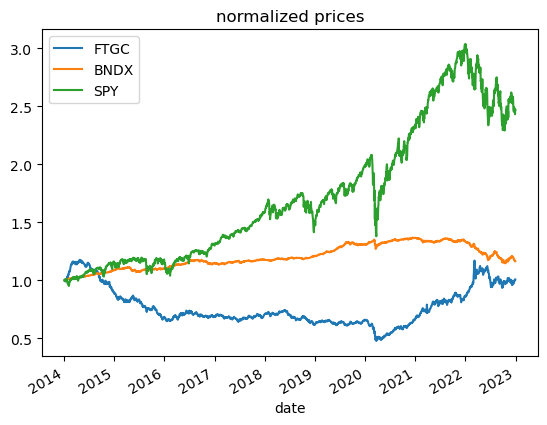

In [5]:
path_to_data = r"C:\Users\Rafay\Documents\thesis3\thesis\ActualWork\e2e\cache"
datatype='cross_asset'
path_to_prices = r'{}/assetprices_weekly_{}.pkl'.format(path_to_data, datatype)
prices = pd.read_pickle(path_to_prices)
daily_prices = prices.reset_index()
daily_prices['year'] = daily_prices['date'].dt.isocalendar().year
daily_prices['week'] = daily_prices['date'].dt.isocalendar().week

weekly_returns = daily_prices.groupby(['year', 'week']).agg(['first']).droplevel(1, axis=1)
weekly_returns.index = weekly_returns.date
weekly_returns = weekly_returns.drop(['date'], axis=1).pct_change()
(1 + weekly_returns.dropna()).cumprod(axis=0).plot(title='compounding based on weekly returns');
prices.divide(prices.iloc[0]).plot(title='normalized prices');
weekly_returns.to_pickle(r'{}\asset_weekly_{}_fixed.pkl'.format(path_to_data, datatype))

In [200]:
class BatchUtils:
    def __init__(self) -> None:
        pass

    def convert_to_sw_batched(self, input_numpy, window_size):
        # convert numpy array to tensor
        input_tensor = torch.from_numpy(input_numpy.to_numpy())

        # calculate number of training points
        num_training_points = input_tensor.size(0) - window_size + 1

        # initialize tensor to hold sliding windows
        sliding_windows = torch.zeros((num_training_points, window_size, input_tensor.size(1)))

        # populate tensor with sliding windows
        for i in range(num_training_points):
            sliding_windows[i] = input_tensor[i:i+window_size]
        
        return sliding_windows

    def convert_performance_periods(self, input_numpy, window_size):
        input_tensor = torch.from_numpy(input_numpy.to_numpy())
        num_training_points = input_tensor.size(0) - window_size + 1

        # define label tensor shape
        label_shape = (num_training_points, 1, input_tensor.size(1))

        # initialize label tensor to zeros
        label_set = torch.zeros(label_shape)

        # populate label tensor with next time period returns
        for i in range(num_training_points-1):
            label_set[i:i+1] = input_tensor[i+window_size:i+window_size+1].unsqueeze(1)

        return label_set
    
    def compute_covariance_matrix(self, sliding_windows):
        # get the number of batches and number of assets
        num_batches, window_size, num_assets = sliding_windows.size()

        # initialize covariance matrix tensor
        covariance_matrix_tensor = torch.zeros((num_batches, num_assets, num_assets))

        # compute covariance matrix for each batch
        for i in range(num_batches):
            batch = sliding_windows[i]
            Q = torch.Tensor(np.cov(batch.numpy().T))
            try:
                L = np.linalg.cholesky(Q)
            except:
                Q = nearestPD(Q)
                L = np.linalg.cholesky(Q)

            L /= np.linalg.norm(L)
            covariance_matrix_tensor[i] = torch.from_numpy(L)

        return covariance_matrix_tensor

In [199]:
import pandas as pd
import numpy as np
from datetime import datetime
import torch
from Backtester.util import *

In [ ]:
b_utils = BatchUtils()


res = y_perf @ torch.transpose(z_star, 1,2)
torch.mean(res) / torch.std(res)

In [172]:
z_star = torch.tensor([[[0.1820, 0.5582, 0.2597]],
        [[0.1823, 0.5593, 0.2584]],
        [[0.1796, 0.5585, 0.2619]],
        [[0.1778, 0.5618, 0.2605]],
        [[0.1816, 0.5722, 0.2462]],
        [[0.1933, 0.5622, 0.2444]],
        [[0.2053, 0.5520, 0.2427]],
        [[0.2070, 0.5509, 0.2420]],
        [[0.2064, 0.5556, 0.2380]],
        [[0.2153, 0.5590, 0.2258]],
        [[0.2149, 0.5591, 0.2261]],
        [[0.2131, 0.5591, 0.2278]],
        [[0.2151, 0.5585, 0.2264]],
        [[0.2120, 0.5576, 0.2304]],
        [[0.2104, 0.5593, 0.2303]],
        [[0.2111, 0.5572, 0.2316]],
        [[0.2103, 0.5578, 0.2319]],
        [[0.2270, 0.5384, 0.2346]],
        [[0.2340, 0.5309, 0.2352]],
        [[0.2300, 0.5332, 0.2368]],
        [[0.2215, 0.5374, 0.2411]],
        [[0.2210, 0.5377, 0.2413]],
        [[0.2443, 0.5111, 0.2446]],
        [[0.2440, 0.5114, 0.2445]],
        [[0.2420, 0.5151, 0.2429]],
        [[0.2456, 0.5154, 0.2390]],
        [[0.2461, 0.5151, 0.2388]],
        [[0.2489, 0.5133, 0.2379]],
        [[0.2543, 0.5069, 0.2388]],
        [[0.2478, 0.5158, 0.2365]],
        [[0.2481, 0.5140, 0.2379]],
        [[0.2466, 0.5141, 0.2392]],
        [[0.2439, 0.5160, 0.2401]],
        [[0.2588, 0.5119, 0.2293]],
        [[0.2449, 0.5220, 0.2331]],
        [[0.2452, 0.5213, 0.2335]],
        [[0.2512, 0.5148, 0.2340]],
        [[0.2489, 0.5179, 0.2333]],
        [[0.2512, 0.5202, 0.2286]],
        [[0.2582, 0.5094, 0.2324]],
        [[0.2576, 0.5010, 0.2415]],
        [[0.2610, 0.4919, 0.2471]],
        [[0.2643, 0.4897, 0.2460]],
        [[0.2610, 0.4967, 0.2423]],
        [[0.2546, 0.5031, 0.2424]],
        [[0.2534, 0.5057, 0.2409]],
        [[0.2547, 0.5049, 0.2403]],
        [[0.2549, 0.5062, 0.2390]],
        [[0.2577, 0.5003, 0.2420]],
        [[0.2635, 0.4847, 0.2518]],
        [[0.2531, 0.4920, 0.2549]],
        [[0.2523, 0.4918, 0.2558]],
        [[0.2580, 0.4824, 0.2596]]])
y_perf = torch.tensor([[[ 1.4677e-02, -2.8048e-03, -4.5892e-03]],

        [[ 2.4259e-02, -4.0968e-03,  2.9199e-03]],

        [[ 1.5133e-02, -4.8184e-03, -1.6500e-02]],

        [[-2.0040e-03, -3.3615e-03,  1.7482e-02]],

        [[-1.6167e-02,  8.5805e-03, -1.3243e-02]],

        [[-7.8802e-04,  3.7320e-04, -2.6082e-02]],

        [[ 1.3578e-02, -1.1184e-03, -5.2081e-03]],

        [[ 4.8154e-03, -2.0833e-03, -3.6794e-03]],

        [[ 9.3155e-03,  1.1186e-03,  1.7422e-02]],

        [[ 1.8985e-02, -1.4892e-03, -1.0548e-03]],

        [[-2.4164e-02, -6.1055e-03, -1.1136e-02]],

        [[ 2.7307e-02,  1.4823e-03,  8.4034e-03]],

        [[-1.7480e-02, -2.6981e-03,  2.0209e-03]],

        [[ 2.0747e-02, -1.4777e-03, -6.0261e-03]],

        [[-2.0704e-03,  9.2439e-04, -3.6216e-03]],

        [[-1.5892e-02,  1.2958e-03, -4.3649e-03]],

        [[-1.4853e-02,  1.3113e-02, -2.6027e-03]],

        [[-1.1900e-02,  7.1861e-03,  3.3712e-03]],

        [[-2.1351e-02,  2.0845e-03, -1.1685e-02]],

        [[ 4.5030e-02, -3.9638e-03,  1.1391e-02]],

        [[-2.4282e-03, -9.6170e-04, -4.1121e-03]],

        [[-1.6162e-03,  1.3777e-02,  1.5114e-02]],

        [[ 1.5589e-02, -1.7192e-03, -3.2520e-03]],

        [[ 1.6482e-03,  3.2580e-03, -1.7966e-02]],

        [[-5.3148e-03, -3.8314e-04,  3.1245e-02]],

        [[ 1.2945e-02,  1.5533e-04, -5.8064e-03]],

        [[ 1.1484e-03, -2.8692e-03, -1.4731e-02]],

        [[ 2.2454e-02, -7.0275e-03, -1.3451e-02]],

        [[ 3.2385e-02, -4.7259e-03,  2.8442e-02]],

        [[ 2.6327e-03, -2.0939e-03, -1.4256e-02]],

        [[-1.5125e-02,  2.8404e-03, -4.2729e-03]],

        [[ 1.5224e-02, -3.7729e-03,  3.3245e-04]],

        [[ 5.1818e-02,  1.1331e-03,  1.1113e-01]],

        [[-4.1570e-02,  7.4201e-03, -4.0701e-02]],

        [[ 6.6785e-03, -9.5614e-03,  4.0515e-04]],

        [[ 8.0790e-03,  3.5971e-03,  7.5518e-03]],

        [[ 8.9847e-04,  0.0000e+00, -7.5914e-03]],

        [[ 4.5126e-03, -1.5123e-03,  4.5394e-02]],

        [[-9.1661e-03, -3.0552e-03, -5.3207e-02]],

        [[-2.5511e-02,  1.5117e-03, -1.5135e-02]],

        [[ 1.4163e-02, -2.0743e-03, -9.0967e-03]],

        [[ 1.9369e-02, -2.6331e-03, -1.7489e-02]],

        [[ 6.3463e-03,  2.2431e-03, -1.6160e-02]],

        [[ 3.8118e-02,  6.2690e-03,  1.1101e-02]],

        [[ 9.9810e-03, -6.9798e-03,  1.1964e-02]],

        [[ 5.7361e-03, -1.8829e-03, -1.6502e-02]],

        [[ 3.3573e-03, -1.6917e-03,  1.8209e-03]],

        [[ 2.0059e-02,  1.7039e-03,  1.6319e-03]],

        [[ 2.3023e-02,  3.7750e-04,  2.6861e-02]],

        [[ 2.5088e-03, -2.4477e-03,  4.1676e-05]],

        [[-6.4806e-03, -8.5523e-04, -1.7251e-02]],

        [[-1.4933e-03,  5.6614e-04,  2.0844e-02]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [67]:
def sharpe_loss(z_star, y_perf):
    """Loss function based on the out-of-sample Sharpe ratio

    Compute the out-of-sample Sharpe ratio of the portfolio z_t over the next 12 time steps. The
    loss is aggregated for all z_t in Z_star and averaged over the number of observations. We use a
    simplified version of the Sharpe ratio, SR = realized mean / realized std dev.

    Inputs
    z_star: Optimal solution. (n_y x 1) tensor of optimal decisions.
    y_perf: Realizations. (perf_period x n_y) tensor of realized values.

    Output
    loss: realized average return over realized volatility from 't' to 't + perf_period'
    """
    loss = -torch.exp(torch.mean(torch.log(y_perf @ z_star), dim=0)) / torch.std(y_perf @ z_star)
    return loss

In [115]:
y_perf @ z_stars + 1

tensor([[0.9989, 0.9980, 0.9989],
        [0.9997, 0.9994, 0.9997],
        [0.9985, 0.9971, 0.9985]])

In [146]:
log_x = torch.log(y_perf @ z_stars + 1)
- (torch.exp(torch.mean(log_x)) - 1) / torch.std(y_perf @ z_stars)

tensor(1.4986)

In [107]:
risk = torch.std(y_perf @ z_stars)
ret = torch.mean(y_perf @ z_stars)
ret = torch.exp(torch.mean() -1)
ret/risk

tensor(434.0487)

In [105]:
loss = ret / risk


tensor(-1.4982)

In [83]:
def gmean(input_x, dim=0):
    log_x = torch.log(input_x+1)
    return torch.exp(torch.mean(log_x)-1)

In [84]:
gmean(y_perf @ z_stars)

tensor(0.3674)

In [45]:
eig = np.array([1.88623686e-03, 1.16799092e-03, 8.37322230e-05])
1/np.linalg.norm(eig)*eig

array([0.84959562, 0.5260845 , 0.03771453])

In [69]:
np.max([x.numpy()[0] for x in grad_vals])
# [x.numpy()[0] for x in grad_vals]

0.0010589396

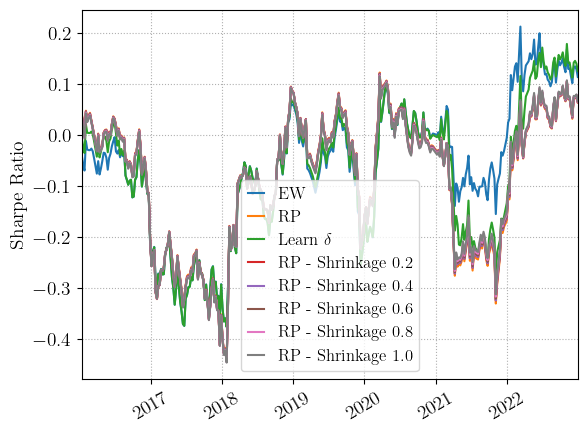

In [53]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
RPShrink0_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
RPShrink02_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.2_value.pkl'.format(datatype))
RPShrink04_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.4_value.pkl'.format(datatype))
RPShrink06_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.6_value.pkl'.format(datatype))
RPShrink08_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.8_value.pkl'.format(datatype))
RPShrink1_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink1_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Learn $\delta$', 'RP - Shrinkage 0.2', 'RP - Shrinkage 0.4', 'RP - Shrinkage 0.6', 'RP - Shrinkage 0.8', 'RP - Shrinkage 1.0']
frames = [EW_value_broad, RP_value_broad, RPShrink0_value_broad, RPShrink02_value_broad, RPShrink04_value_broad, RPShrink06_value_broad, RPShrink08_value_broad, RPShrink1_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])

# with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
#     delta_vals = pickle.load(f)
    
# ax2 = ax.twinx()
# ax2.plot(EW_value_broad['date'], delta_vals, 'g-')

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
# ax2.set_ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.legend(fontsize=12, handlelength=1)


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

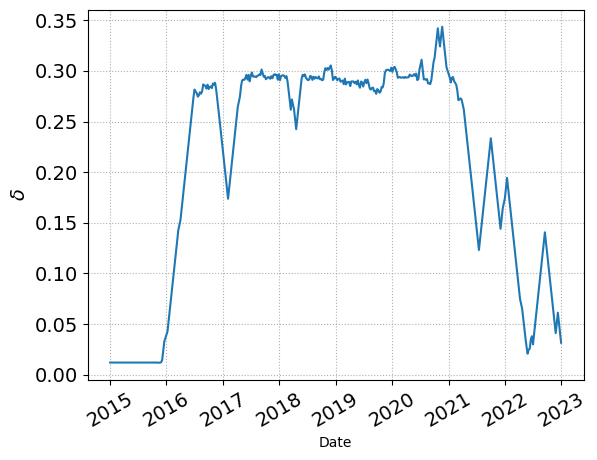

In [18]:
plt.plot(NN_value_broad['date'], delta_vals)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.xlabel('Date')
plt.ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

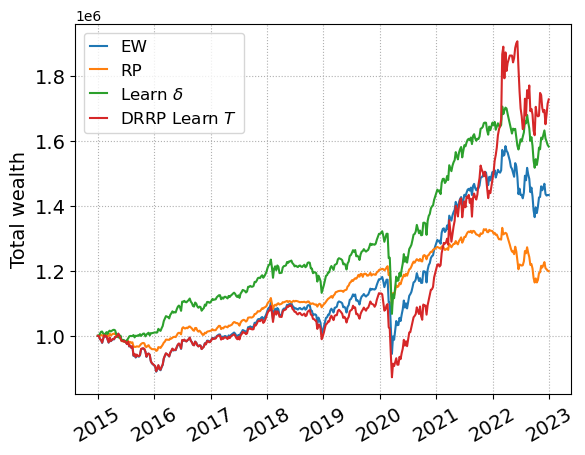

In [5]:
datatype = 'cross_asset'
EW_value_ca = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_ca = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value_ca = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
TTrain_value_ca = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_ca, RP_value_ca, NN_value_ca, TTrain_value_ca]
sharpe_results_ca = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

In [77]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'Learn $T$']
frames = [EW_value, RP_value, NN_value, TTrain_value]
for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

NameError: name 'TTrain_value' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
def LoadData(path_to_data, e2e=True, datatype='broad'):
    if e2e:
        path_to_returns = r'{}\asset_weekly_{}.pkl'.format(path_to_data, datatype)
        path_to_prices = r'{}\assetprices_weekly_{}.pkl'.format(path_to_data, datatype)
        path_to_factors = r'{}\factor_weekly_{}.pkl'.format(path_to_data, datatype)

        returns = pd.read_pickle(path_to_returns)
        prices = pd.read_pickle(path_to_prices)
        factors = pd.read_pickle(path_to_factors)

        assets_list = prices.columns.to_list()

        returns = returns.reset_index()
        prices = prices.reset_index()
        factors = factors.reset_index()

        factors = factors.rename(columns={"Date": "date", "Mkt-RF": "RF"})
        factors = factors[['date'] + factors_list]

        return returns, assets_list, prices, factors

    path_to_prices = r'{}\prices.csv'.format(path_to_data)
    path_to_factors = r'{}\3factors.csv'.format(path_to_data)

    prices = pd.read_csv(path_to_prices)
    factors = pd.read_csv(path_to_factors)

    assets_list = list(prices['symbol'].unique())

    assets_list_cleaned = [x for x in assets_list if str(x) != 'nan']

    pivot_prices = np.round(pd.pivot_table(prices, values='close', 
                                    index='date', 
                                    columns='symbol', 
                                    aggfunc=np.mean),2)
    pivot_prices = pivot_prices.reset_index()
    pivot_prices['date'] = pd.to_datetime(pivot_prices['date'])
    factors['date'] = pd.to_datetime(factors['Date'], format="%Y%m%d")

    pivot_prices = pivot_prices.set_index('date')
    returns = pivot_prices.pct_change()
    pivot_prices = pivot_prices.reset_index()
    returns = returns.reset_index()
    returns = returns.merge(factors, on='date', how='left')
    returns = returns.drop(['Date'], axis=1)
    returns = returns.dropna()

    return returns, assets_list_cleaned, pivot_prices, []


Text(0, 0.5, 'Rolling 30-day Volatility')

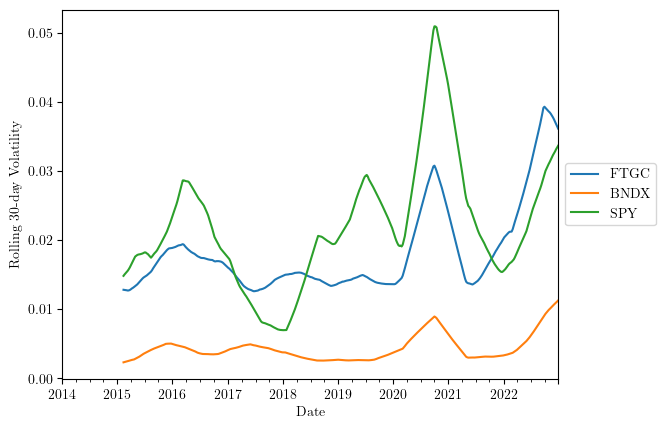

In [123]:
datatype='cross_asset'
factors_list = ['RF']
path_to_data = r"C:\Users\Rafay\Documents\thesis\ActualWork\e2e\cache"
returns, assets_list_cleaned, prices, factors = LoadData(path_to_data, e2e=True, datatype=datatype)
returns = returns.set_index('date')
returns.rolling(30).std().rolling(30).mean().plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Rolling 30-day Volatility')

Text(0, 0.5, 'Log Prices')

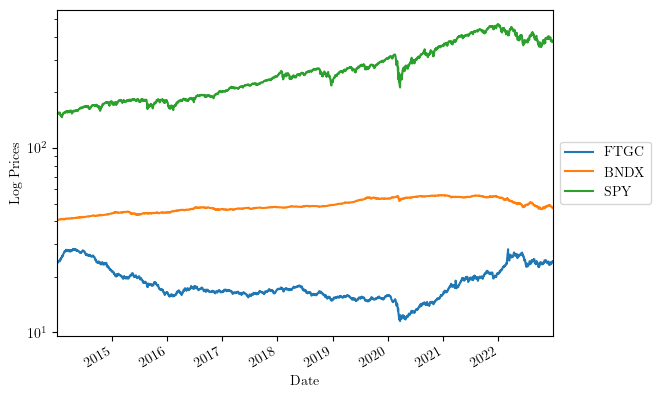

In [198]:
datatype='cross_asset'
factors_list = ['RF']
path_to_data = r"C:\Users\Rafay\Documents\thesis\ActualWork\e2e\cache"
returns, assets_list_cleaned, prices, factors = LoadData(path_to_data, e2e=True, datatype=datatype)
prices = prices.set_index('date')
returns = returns.set_index('date')
prices.plot(logy=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Log Prices')

In [41]:
import numpy as np

Text(0, 0.5, 'Av')

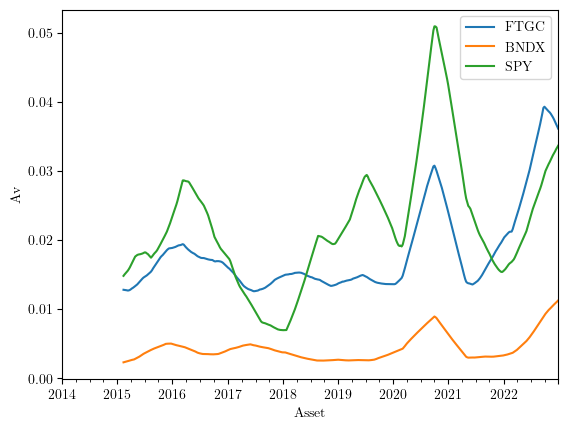

In [83]:
returns.rolling(30).std().rolling(30).mean().plot()
plt.xlabel('Asset')
plt.ylabel('Av')

Text(0, 0.5, '30-Day Rolling Correlation of Assets')

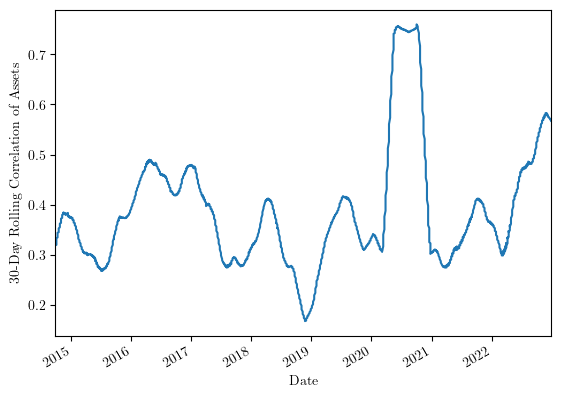

In [70]:
n = len(columns)
returns = returns.set_index('date')
rollingcor = returns.rolling(30).corr()
rollingcor.reset_index().drop('level_1', axis=1).set_index('date').mean(axis=1).rolling(30).mean().plot()
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Correlation of Assets')

In [125]:
(list(returns.columns))

['FTGC', 'BNDX', 'SPY']

In [122]:
"""
\begin{table}
\begin{description}
\item{Raw term frequencies.}
\end{description}
    \begin{tabular}{|l|l|l|l|l|}
        \hline
        term      & Dawn & Beatrice & She & Regeneration \\ \hline
        happiness & 40   & 20       & 0   & 7            \\ 
        surprise  & 23   & 43       & 7   & 0            \\ 
        family    & 32   & 0        & 15  & 12           \\ 
        adventure & 0    & 7        & 6   & 0            \\
        \hline
    \end{tabular}
\end{table}
"""

figure_describe = "Assets Used - Broad Equity Assets."
list(returns.columns)
header_row = [" "]*len(list(returns.columns))
row_1 = list(returns.columns)[0:5]
row_2 = list(returns.columns)[5:10]
row_3 = list(returns.columns)[10:15]
row_4 = list(returns.columns)[15:20]
print(len(row_1))
print(len(row_2))
print(len(row_3))
print(len(row_4))
row_data = [row_1, row_2, row_3, row_4]
print(row_data)
def write_table(assembled_parts):
    """
    input: assembled_parts
    assembled_parts will consist out of (in sequence)
    - figure_describe:  used for \item{ }
    - header_row:       contains names of the table header
    - row_data:         multi-dimensional list
    """
    
    figure_describe, header_row, row_data = assembled_parts

    # internal helper function
    def convert_row_to_latex(spacers, row_input):
        parsed = ""
        for distance in spacers:
            parsed += (" & %"+str(-distance)+"s")
        parsed = parsed[2:]
        parsed = parsed % tuple(row_input)
        parsed += " \\\\"
        return parsed

    def calculate_spacers():
        temp_cells = [header_row] + row_data
        cell_lengths = []
        for cell in range(len(header_row)):
            max_length = 0
            for col in range(len(temp_cells)):
                print("({}, {})".format(col, cell))
                cell_length = len(temp_cells[col][cell])
                if cell_length > max_length:
                    max_length = cell_length
            cell_lengths.append(max_length)

        return cell_lengths

    num_cols = len(header_row)
    fence_posts = "".join(["|l" for i in range(num_cols)]) + "|"
    
    print('\\begin{table}')
    print('\\begin{description}')
    print('\\item{%s}' % (figure_describe))
    print('\\end{description}')
    print('\t\\begin{tabular}{%s}' % (fence_posts))
    print('\t\t\\hline')

    # let's format this for human reading of the output.
    spacers = calculate_spacers()
    
    for row in range(len(row_data)+1):
        if row == 0:
            headers = convert_row_to_latex(spacers, header_row) + " \\hline"
            print("\t\t" + headers)
        else:
            row_content = convert_row_to_latex(spacers, row_data[row-1])
            print('\t\t' + row_content)
    print('\t\t\\hline')
    print('\t\\end{tabular}')
    print('\\end{table}')      

assembled_parts = [figure_describe, header_row, row_data]
write_table(assembled_parts)

5
5
5
5
[['AAPL', 'MSFT', 'AMZN', 'C', 'JPM'], ['BAC', 'XOM', 'HAL', 'MCD', 'WMT'], ['COST', 'CAT', 'LMT', 'JNJ', 'PFE'], ['DIS', 'VZ', 'T', 'ED', 'NEM']]
\begin{table}
\begin{description}
\item{Assets Used - Broad Equity Assets.}
\end{description}
	\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
		\hline
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(0, 1)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(0, 2)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(0, 3)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(0, 4)
(1, 4)
(2, 4)
(3, 4)
(4, 4)
(0, 5)
(1, 5)


IndexError: list index out of range

In [15]:
import pickle

In [16]:
with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
    delta_vals = pickle.load(f)

In [17]:
plt.plot(EW_value['date'], delta_vals)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.xlabel('Date')
plt.ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

NameError: name 'EW_value' is not defined

In [87]:
EW_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
RP_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
NN_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
TTrain_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))

In [48]:
EW_value = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))


<AxesSubplot:xlabel='date'>

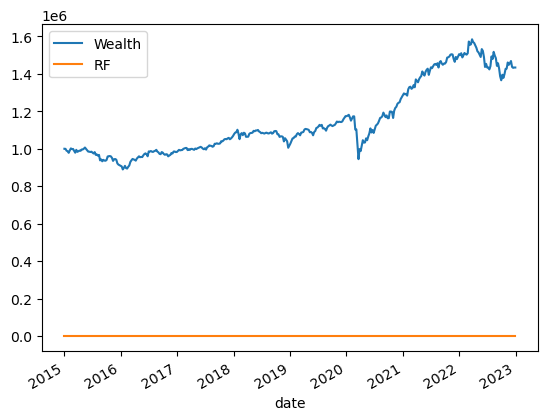

In [69]:
EW_value.plot(x='date')

In [126]:
datatype = 'cross_asset'
EW_value_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
RP_value_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
NN_value_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
TTrain_value_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))


In [ ]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_holdings, RP_value_holdings, NN_value_holdings, TTrain_value_holdings]
for indx, frame in enumerate(frames):
    frame.plot.bar()
    # plt.plot(label=names[indx])
    break
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)


In [206]:
import SGCharts
from distinctipy import distinctipy

ModuleNotFoundError: No module named 'distinctipy'

In [275]:
datatype='cross_asset'
f, axarr = plt.subplots(2,2, figsize=(16,8))
names = ['Equal Weight', 'Risk Parity', 'DRRP - Learn Delta', 'DRRP - Learn T']

for name in names:    
    print("""
    \begin{{figure}}[H]
    \centering
    \includegraphics[width=13cm]{img/Holdings_{name}_{datatype}.png}
    \caption{Portfolio Holdings - {datatype_name}}
    \label{fig:holdings_{name}_{datatype}}
    \end{figure}
    """.format(
                name=name,
                datatype=datatype,
                datatype_name=''
))

# axarr[0,0].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('Equal Weight', datatype)), aspect='auto')
# axarr[0,0].axis('off')
# axarr[0,1].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('Risk Parity', datatype)), aspect='auto')
# axarr[0,1].axis('off')
# axarr[1,0].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('DRRP - Learn Delta', datatype)), aspect='auto')
# axarr[1,0].axis('off')
# axarr[1,1].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('DRRP - Learn T', datatype)), aspect='auto')
# axarr[1,1].axis('off')
# f.savefig('Results/{}_all.png'.format(datatype))

ValueError: unexpected '{' in field name

ConversionError: Failed to convert value(s) to axis units: ['2015-01-02', '2015-02-06', '2015-03-13', '2015-04-24', '2015-05-29', '2015-07-10', '2015-08-14', '2015-09-18', '2015-10-23', '2015-11-27', '2016-01-15', '2016-02-19', '2016-04-01', '2016-05-06', '2016-06-10', '2016-07-15', '2016-08-19', '2016-09-23', '2016-10-28', '2016-12-02', '2017-01-06', '2017-02-10', '2017-03-17', '2017-04-28', '2017-06-02', '2017-07-07', '2017-08-11', '2017-09-15', '2017-10-20', '2017-11-24', '2017-12-29', '2018-02-02', '2018-03-09', '2018-04-20', '2018-05-25', '2018-06-29', '2018-08-03', '2018-09-07', '2018-10-12', '2018-11-16', '2018-12-21', '2019-01-25', '2019-03-01', '2019-04-05', '2019-05-17', '2019-06-21', '2019-07-26', '2019-08-30', '2019-10-04', '2019-11-08', '2019-12-13', '2020-01-17', '2020-02-21', '2020-03-27', '2020-05-08', '2020-06-12', '2020-07-24', '2020-08-28', '2020-10-02', '2020-11-06', '2020-12-11', '2021-01-29', '2021-03-05', '2021-04-16', '2021-05-21', '2021-06-25', '2021-07-30', '2021-09-03', '2021-10-08', '2021-11-12', '2021-12-17', '2022-01-28', '2022-03-04', '2022-04-08', '2022-05-20', '2022-06-24', '2022-07-29', '2022-09-02', '2022-10-07', '2022-11-11', '2022-12-16']

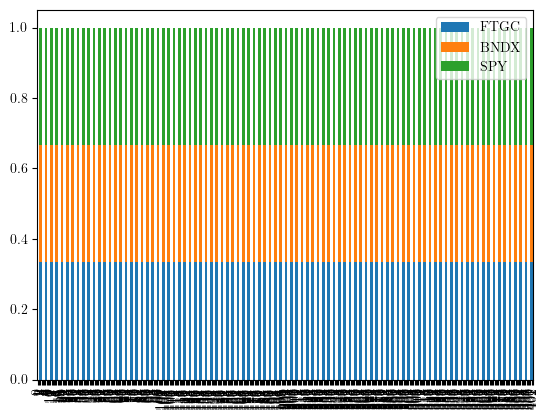

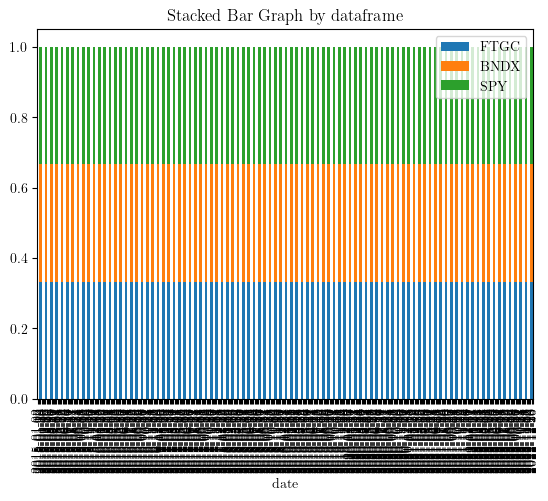

In [184]:
ax = EW_value_holdings.plot.bar(stacked=True)
ax = EW_value_holdings.plot(x='date', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')

dates = list(EW_value_holdings['date'])
xticks = []
for i in range(0,len(dates),5):
    xticks = xticks + [dates[i]]

ax.set_xticks(xticks)